# Notebook for gridding severe hail reports from the SPC

### Import necessary libraries

In [36]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

## Read in shapefile containing SPC hail reports from 1955-2021

In [2]:
reports = gpd.read_file('/home/jgoodin1/shapefiles/1955-2021-hail-initpoint.shp')

In [3]:
reports

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,fat,loss,closs,slat,slon,elat,elon,len,wid,geometry
0,327,1955,10,16,1955-10-16,13:15:00,3,NJ,34,1,...,0,0.0,0.0,40.2000,-74.0800,40.2001,-74.0799,0,0,POINT (-74.08000 40.20000)
1,328,1955,10,23,1955-10-23,18:00:00,3,MI,26,7,...,0,0.0,0.0,42.5800,-85.9000,42.5801,-85.8999,0,0,POINT (-85.90000 42.58000)
2,329,1955,10,28,1955-10-28,06:30:00,3,AR,5,12,...,0,0.0,0.0,34.7000,-92.2800,34.7001,-92.2799,0,0,POINT (-92.28000 34.70000)
3,330,1955,10,28,1955-10-28,16:45:00,3,AL,1,9,...,0,0.0,0.0,33.2800,-86.7800,33.2801,-86.7799,0,0,POINT (-86.78000 33.28000)
4,326,1955,10,6,1955-10-06,12:00:00,3,IL,17,8,...,0,0.0,0.0,39.5800,-90.7800,39.5801,-90.7799,0,0,POINT (-90.78000 39.58000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377022,663309,2021,9,8,2021-09-08,12:30:00,3,SC,45,0,...,0,100.0,100.0,34.6545,-80.7643,34.6545,-80.7643,0,0,POINT (-80.76430 34.65450)
377023,663310,2021,9,8,2021-09-08,15:20:00,3,VA,51,0,...,0,0.0,0.0,37.1900,-76.4100,37.1900,-76.4100,0,0,POINT (-76.41000 37.19000)
377024,663311,2021,9,8,2021-09-08,15:33:00,3,VA,51,0,...,0,0.0,0.0,37.1900,-76.5500,37.1900,-76.5500,0,0,POINT (-76.55000 37.19000)
377025,663312,2021,9,9,2021-09-09,12:35:00,3,PR,72,0,...,0,500.0,0.0,18.3213,-66.9144,18.3036,-66.9286,0,0,POINT (-66.91440 18.32130)


## Resample reports to match WRF HIST epoch (1990-2005)

In [6]:
wrf_hist_reports = reports[(reports['yr'] >= 1990) & (reports['yr'] <= 2005)]

In [7]:
wrf_hist_reports

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,fat,loss,closs,slat,slon,elat,elon,len,wid,geometry
47291,3560,1990,10,16,1990-10-16,17:45:00,3,TX,48,688,...,0,0.000,0.0,31.23,-102.68,31.2301,-102.6799,0,0,POINT (-102.68000 31.23000)
47292,3561,1990,10,17,1990-10-17,07:24:00,3,WI,55,51,...,0,0.000,0.0,43.88,-88.93,43.8801,-88.9299,0,0,POINT (-88.93000 43.88000)
47293,3562,1990,10,17,1990-10-17,08:35:00,3,MN,27,81,...,0,0.000,0.0,46.72,-92.45,46.7201,-92.4499,0,0,POINT (-92.45000 46.72000)
47294,3563,1990,10,17,1990-10-17,12:50:00,3,IA,19,66,...,0,4.000,0.0,41.47,-92.67,41.4701,-92.6699,0,0,POINT (-92.67000 41.47000)
47295,3564,1990,10,17,1990-10-17,13:10:00,3,IA,19,67,...,0,4.000,0.0,41.58,-92.42,41.5801,-92.4199,0,0,POINT (-92.42000 41.58000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195506,12370,2005,9,9,2005-09-09,14:45:00,3,UT,49,16,...,0,0.004,0.0,38.73,-110.50,38.7301,-110.4999,0,0,POINT (-110.50000 38.73000)
195507,12371,2005,9,9,2005-09-09,16:15:00,3,UT,49,17,...,0,0.000,0.0,38.97,-109.72,38.9701,-109.7199,0,0,POINT (-109.72000 38.97000)
195508,12372,2005,9,9,2005-09-09,18:02:00,3,AZ,4,53,...,0,0.000,0.0,33.42,-111.82,33.4201,-111.8199,0,0,POINT (-111.82000 33.42000)
195509,12373,2005,9,9,2005-09-09,18:52:00,3,AZ,4,54,...,0,0.000,0.0,34.43,-110.60,34.4301,-110.5999,0,0,POINT (-110.60000 34.43000)


### Resample to include only severe reports (mag is size in inches contained in hail report)

In [8]:
sev_reports = wrf_hist_reports.where(wrf_hist_reports['mag'] >= 1)
sev_reports

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,fat,loss,closs,slat,slon,elat,elon,len,wid,geometry
47291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
47292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
47293,3562.0,1990.0,10.0,17.0,1990-10-17,08:35:00,3.0,MN,27.0,81.0,...,0.0,0.000,0.0,46.72,-92.45,46.7201,-92.4499,0.0,0.0,POINT (-92.45000 46.72000)
47294,3563.0,1990.0,10.0,17.0,1990-10-17,12:50:00,3.0,IA,19.0,66.0,...,0.0,4.000,0.0,41.47,-92.67,41.4701,-92.6699,0.0,0.0,POINT (-92.67000 41.47000)
47295,3564.0,1990.0,10.0,17.0,1990-10-17,13:10:00,3.0,IA,19.0,67.0,...,0.0,4.000,0.0,41.58,-92.42,41.5801,-92.4199,0.0,0.0,POINT (-92.42000 41.58000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195506,12370.0,2005.0,9.0,9.0,2005-09-09,14:45:00,3.0,UT,49.0,16.0,...,0.0,0.004,0.0,38.73,-110.50,38.7301,-110.4999,0.0,0.0,POINT (-110.50000 38.73000)
195507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
195508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
195509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


## Remove nan values from geodataframe

In [9]:
sev_reports_hist = sev_reports.dropna()
sev_reports_hist

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,fat,loss,closs,slat,slon,elat,elon,len,wid,geometry
47293,3562.0,1990.0,10.0,17.0,1990-10-17,08:35:00,3.0,MN,27.0,81.0,...,0.0,0.000,0.0,46.72,-92.45,46.7201,-92.4499,0.0,0.0,POINT (-92.45000 46.72000)
47294,3563.0,1990.0,10.0,17.0,1990-10-17,12:50:00,3.0,IA,19.0,66.0,...,0.0,4.000,0.0,41.47,-92.67,41.4701,-92.6699,0.0,0.0,POINT (-92.67000 41.47000)
47295,3564.0,1990.0,10.0,17.0,1990-10-17,13:10:00,3.0,IA,19.0,67.0,...,0.0,4.000,0.0,41.58,-92.42,41.5801,-92.4199,0.0,0.0,POINT (-92.42000 41.58000)
47296,3565.0,1990.0,10.0,17.0,1990-10-17,15:50:00,3.0,TX,48.0,689.0,...,0.0,0.000,0.0,32.93,-97.35,32.9301,-97.3499,0.0,0.0,POINT (-97.35000 32.93000)
47301,3570.0,1990.0,10.0,17.0,1990-10-17,18:10:00,3.0,TX,48.0,694.0,...,0.0,0.000,0.0,33.62,-95.05,33.6201,-95.0499,0.0,0.0,POINT (-95.05000 33.62000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195491,12353.0,2005.0,9.0,9.0,2005-09-09,06:35:00,3.0,ND,38.0,382.0,...,0.0,0.000,0.0,47.68,-97.75,47.6801,-97.7499,0.0,0.0,POINT (-97.75000 47.68000)
195492,12357.0,2005.0,9.0,9.0,2005-09-09,06:45:00,3.0,ND,38.0,386.0,...,0.0,0.000,0.0,48.02,-99.33,48.0201,-99.3299,0.0,0.0,POINT (-99.33000 48.02000)
195500,12364.0,2005.0,9.0,9.0,2005-09-09,10:30:00,3.0,MN,27.0,546.0,...,0.0,0.000,0.0,47.28,-96.55,47.2801,-96.5499,0.0,0.0,POINT (-96.55000 47.28000)
195505,12369.0,2005.0,9.0,9.0,2005-09-09,13:30:00,3.0,UT,49.0,15.0,...,0.0,0.000,0.0,39.55,-111.87,39.5501,-111.8699,0.0,0.0,POINT (-111.87000 39.55000)


In [10]:
sev_reports_hist['mag'].min() #Make sure min mag value from dataset is 1

1.0

<AxesSubplot:>

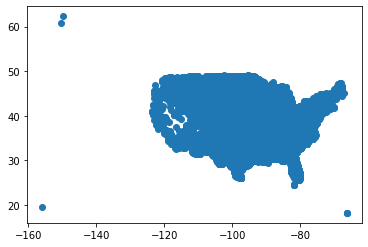

In [11]:
sev_reports_hist.geometry.plot()

### Read in WRF lats/lons

In [12]:
coords = xr.open_dataset('lat_lon.nc') #Open .nc file containing WRF lat/lon coords

### Assign lat/lon coords from file to variables

In [13]:
lats = coords.CLAT.values[0, :, :]
lons = coords.CLONG.values[0, :, :]

## Create vectorized array of severe hail reports using 2D histogram bins for lats/lons

In [91]:
#loop through the years and create a vectorized array of reports per year
nx = 75
ny = 55
hail_lons = sev_reports_hist['slon']
hail_lats = sev_reports_hist['slat']
####################################################
# compute appropriate bins to histogram the data into
lon_bins = np.linspace(lons.min(), lons.max(), nx+1) #Need to create two versions because of matplotlib figure specs
lat_bins = np.linspace(lats.min(), lats.max(), ny+1)
lon_bins1 = np.linspace(lons.min(), lons.max(), nx)
lat_bins1 = np.linspace(lats.min(), lats.max(), ny)
# Histogram the lats and lons to produce an array of frequencies in each box.
# Because histogram2d does not follow the cartesian convention 
# (as documented in the numpy.histogram2d docs) we need to provide lats and lons rather than lons and lats
density, _, _ = np.histogram2d(hail_lats, hail_lons, [lat_bins, lon_bins])
# Turn the lon/lat bins into 2 dimensional arrays ready for conversion into projected coordinates
lon_bins_2d, lat_bins_2d = np.meshgrid(lon_bins, lat_bins) # BINS FOR FIGURE Generation
lon_bins_2d1, lat_bins_2d1 = np.meshgrid(lon_bins1, lat_bins1) # BINS FOR netCDF

In [92]:
density.max()

447.0

## Plot binned severe hail reports on map of CONUS

/tmp/ipykernel_13943/906550440.py:37: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("plasma"))
  cmap.set_over('lemonchiffon')
/anaconda3/envs/pyEAE/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


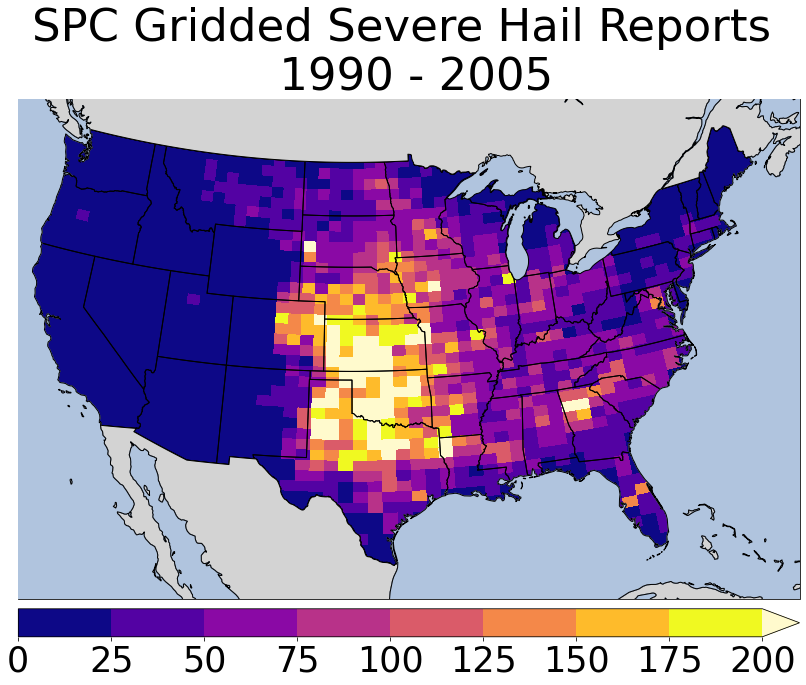

In [97]:
import matplotlib as mpl
import matplotlib.cm as cm

fig = plt.figure(figsize= (14,10)) #Plot a figure
gs1 = gridspec.GridSpec(2, 1, height_ratios=[1, .05], bottom=.05, top=.95, wspace=.1)
map_proj = ccrs.LambertConformal(central_longitude = -100, central_latitude = 35) #Set projection, central lat/lon
ax = plt.subplot(projection = map_proj)
ax.add_feature(cfeature.LAND.with_scale('10m')) #Add land
countries_shp = shpreader.natural_earth(resolution='50m',
                                     category='cultural',
                                     name='admin_0_countries')
for country, info in zip(shpreader.Reader(countries_shp).geometries(), 
                             shpreader.Reader(countries_shp).records()):
        if info.attributes['NAME_LONG'] != 'United States':

            ax.add_geometries([country], ccrs.PlateCarree(),
                             facecolor='lightgrey', edgecolor='k', zorder=6)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m', edgecolor='k', 
                                                facecolor='None'), zorder=8) 
ax.add_feature(cfeature.BORDERS.with_scale('10m')) #Add state borders
ax.add_feature(cfeature.STATES.with_scale('10m'), facecolor = 'none') #Add US states
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', 
                                                facecolor='lightsteelblue'), zorder=6)
lakes_shp = shpreader.natural_earth(resolution='50m',
                                     category='physical',
                                     name='lakes')
for lake, info in zip(shpreader.Reader(lakes_shp).geometries(), 
                             shpreader.Reader(lakes_shp).records()):
        name = info.attributes['name']
        if name == 'Lake Superior' or name == 'Lake Michigan' or \
           name == 'Lake Huron' or name == 'Lake Erie' or name == 'Lake Ontario':
            
            ax.add_geometries([lake], ccrs.PlateCarree(),
                             facecolor='lightsteelblue', edgecolor='k', zorder=6)
ax.set_extent([240,287,22,50]) #Set lat/lon boundaries
cmap = cm.get_cmap('plasma')
cmap.set_over('lemonchiffon')
levels = np.arange(0, 225, 25)
lrFig = ax.pcolormesh(lon_bins_2d, lat_bins_2d, density, vmax = 225, transform = ccrs.PlateCarree(), cmap=cmap, vmin=levels[1], norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, 
                                                                                                                                    clip=False))
#gls = ax.gridlines(draw_labels=True, dms = True, x_inline=False, y_inline=False, color="black", linestyle="dotted", zorder = 10)
#gls.top_labels=False
#gls.right_labels=False
#gls.xlabel_style = {'size': 18, 'rotation': 0}
#gls.xpadding = 12.0
#gls.ylabel_style = {'size': 18}
plt.title("SPC Gridded Severe Hail Reports \n 1990 - 2005", fontsize = 45)
ax1 = plt.subplot(gs1[1, 0])
cb = plt.colorbar(lrFig, cax = ax1, ticks = [0, 25, 50, 75, 100, 125, 150, 175, 200], orientation = 'horizontal', extend = 'max')
#cb.set_label('Days', fontsize = 30)
cb.ax.tick_params(labelsize = 35)
plt.subplots_adjust(bottom=0.02)
plt.savefig('/home/scratch/jgoodin/gridded_sev_hail_reports.png') #**Make sure to save results to png!**